# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [135]:
# Q1 (code)
# Install necessary libraries
!pip install tomotopy
!pip install little_mallet_wrapper

# Import libraries
import pandas as pd
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import re

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [136]:
# Q2 (code)

# Load datasets
trump_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/trump_tweets.csv')
sanders_tweets_df = pd.read_csv('/Users/macbook/Downloads/Assignment3-AD/sanders_tweets.csv')

# Concatenate the two datasets
tweets_df = pd.concat([sanders_tweets_df, trump_tweets_df], ignore_index=True)

# Display the first few rows of the combined dataset to verify concatenation
print(tweets_df.head())

     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [ ]:
# Q3 (code)

# Tip: add the following line to remove URLS and user mentions
processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

In [140]:
# Q3 (code)

# Get original texts, authors, and tweet IDs from tweets_df DataFrame
original_texts = tweets_df['Content'].tolist()
authors = tweets_df['Username'].tolist()
tweet_ids = tweets_df['TweetId'].tolist()

# Initialize empty lists to store processed texts and titles
training_data = []
titles = []

for text, author, tweet_id in zip(original_texts, authors, tweet_ids):
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')  # Process the original text
    processed_text = re.sub(r"http\S+|www\S+|https:\/\/t|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE) # Remove URLs, mentions, etc.
    training_data.append(processed_text)  # Append the processed text to the training data list
    title = f"{author}_ID{tweet_id}"  
    titles.append(title)  # Append the title to the titles list

# Print the lengths of processed text list, original text list, and titles list
print(len(training_data), len(original_texts), len(titles))

30371 30371 30371


## LDA topic modelling

### Q4. Train a an LDA topic model with tomotopy

In [189]:
# Q4 (code)
# Define the number of topics and create an LDA model
num_topics = 15
lda_model = tp.LDAModel(k=num_topics)

# Add the preprocessed data
for text in training_data:
    lda_model.add_doc(text.split())

# Train the model
lda_model.train(0) 
num_iters = 10
for i in range(num_iters):
    lda_model.train(1)
    print('Iteration: {:d} Log-likelihood: {:.3f}'.format(i, lda_model.ll_per_word))

Iteration: 0 Log-likelihood: -11.056
Iteration: 1 Log-likelihood: -10.555
Iteration: 2 Log-likelihood: -10.321
Iteration: 3 Log-likelihood: -10.176
Iteration: 4 Log-likelihood: -10.070
Iteration: 5 Log-likelihood: -9.984
Iteration: 6 Log-likelihood: -9.904
Iteration: 7 Log-likelihood: -9.832
Iteration: 8 Log-likelihood: -9.761
Iteration: 9 Log-likelihood: -9.688


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [190]:
# Q5a (code)
# Get the top words for each topic
num_topic_words = 10

print("\nTopic Model Results:\n")
topics = []
topic_individual_words = []
for topic_id in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in lda_model.get_topic_words(topic_id=topic_id, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"Topic {topic_id}: {topic_words}\n")


Topic Model Results:

Topic 0: trump tax people american would president cuts years great time

Topic 1: president democrats news fake media impeachment never get many house

Topic 2: people health care america americans trump must workers country american

Topic 3: great border president trump new military states united done total

Topic 4: people big great need vote american americans democrats new congress

Topic 5: trump people great american president today must thank country democrats

Topic 6: people must make public trump year energy fossil america americans

Topic 7: trump president democrats biden great vote thank fbi day joe

Topic 8: great thank president people vote republican country strong trump state

Topic 9: great america thank tonight president today people big trump whitehouse

Topic 10: president trump would great russia election democrats never house court

Topic 11: people great north korea today china president country trump united

Topic 12: people workers wag

Q5b (words)
Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic 0 discusses tax cuts and economic policies over the years, with keywords like "tax", "people", "american", "cuts", "years." It emphasizes the impact of these policies on the American people and the economy.

Topic 1 revolves around the relationship between Democrats, the media, and the impeachment process, with keywords like"democrats", "news", "fake", "media", "impeachment." It indicates the role of fake news and media coverage in shaping public opinion on impeachment proceedings.

Topic 2 emphasizes the importance of healthcare and the well-being of Americans, with keywords like "People", "health", "care","Trump", "workers." It maybe discussed the need for accessible healthcare and better conditions for American workers.

Topic 3 focuses on border security and military strength under President Trump's leadership with keywords like "Great", "border", "president", "Trump", "new", "military", "states." It maybe discussed efforts to strengthen borders and enhance the military's capabilities.

Topic 4 highlights the Democratic agenda and the importance of voter engagement, with keywords like "People", "great", "vote", "Democrats", "new", "Congress." It indicates the needs of the American people and the role of Congress in addressing them.

Topic 5 seems like an assertion praising President Trump as a great American leader today, with keywords like "great", "American", "president", "thank", "country." And according to the keywords, it also urges gratitude towards him for his contributions to the country

Topic 6 focuses on energy policy and environmental concerns, particularly regarding fossil fuels, with keywords like "year", "energy", "fossil", "America ." It refelctes efforts to address energy needs while considering environmental impacts.

Topic 7 examines the dynamics between President Trump, Democrats, and voting behavior, with keywords like "Trump", "president", "Democrats", "Biden", "great", "vote", "thank", "FBI." It hights Trump's interactions with Democrats, voting patterns, and political developments.      

Topic 8 highlights support for President Trump and the Republican Party, with keywords like "Vote", "Republican", "country", "strong", "Trump." It emphasizes the strength of states aligned with Republican values. The importance of voting and maintaining a strong Republican presence may be discussed in this topic.

Topic 9 celebrates American greatness and President Trump's leadership, with keywords like "Thank", "tonight", "president", "Trump", "White House". It highlights trump's achievements in office.

Topic 10 discusses controversies surrounding President Trump, Russia, and election interference, with keywords like  "President", "Trump", "would", "great", "election", "never", "house", "Russia", "Democrats", "court." Policies of collusion and legal battles related to the 2016 election may be examined in this topic.

Topic 11 focuses on international relations and President Trump's approach to countries like North Korea and China, with keywords like "North Korea", "today", "China", "country". It refleces diplomatic and geopolitical dynamics.

Topic 12 highlights concerns about workers' rights and wage issues in America, with keywords like  "People", "workers", "wage", "American", "jobs", "pay." It discusses the need for fair wages and better job opportunities for American workers.

Topic 13 examines criticism of President Trump by the media and political opponents, with keywords like "Trump", "Republicans", "country", "news", "fake". It discusses accusations of fake news and biases in media coverage of Trump's administration.

Topic 14 suggestes discussions possibly criticizing President Trump, media outlets, and Democrats for perpetuating fake news and implying negative associations with Russia, with keywords like "People", "Trump",  "Russia", "country",  "fake", "news."

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [192]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(lda_model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(lda_model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.45038959821065266 
Per Topic: [0.36208033561706543, 0.5598479852080345, 0.5293878618627786, 0.4863892650231719, 0.39831937849521637, 0.33338465392589567, 0.46187541335821153, 0.437578073143959, 0.42514755185693504, 0.3971868481487036, 0.5044621050357818, 0.42864096388220785, 0.4860883478075266, 0.41194571554660797, 0.533509474247694]



In [253]:
# Initialize lists to store coherence scores
coherence_scores = []
coherence_scores_per_topic = []

# Iterate over different number of topics 
for num_topics in range(10, 40, 10):
    # Create a new LDA model
    new_lda_model = tp.LDAModel(k=num_topics)
    for text in training_data:
        new_lda_model.add_doc(text.split())

    # Train the new model
    new_lda_model.train(0) 
    num_iters = 10
    for i in range(num_iters):
        new_lda_model.train(1)

    # Calculate coherence score for the new model
    coh = tp.coherence.Coherence(new_lda_model, coherence='c_v')
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(new_lda_model.k)]
    coherence_scores.append(average_coherence)
    coherence_scores_per_topic.append(coherence_per_topic)

    print('==== Coherence for {} Topics : c_v ===='.format(num_topics))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()

==== Coherence for 10 Topics : c_v ====
Average: 0.35509324301034206 
Per Topic: [0.441835118085146, 0.3253971129655838, 0.42584021389484406, 0.29597937539219854, 0.4398730989545584, 0.3249121457338333, 0.39208352342247965, 0.2912594169378281, 0.312455415725708, 0.30129700899124146]

==== Coherence for 20 Topics : c_v ====
Average: 0.44335938200354574 
Per Topic: [0.36015896424651145, 0.5147214904427528, 0.45413355212658646, 0.5481517270207406, 0.41993376687169076, 0.4407545834779739, 0.42907101288437843, 0.4798730880022049, 0.40322338566184046, 0.39261874556541443, 0.4645830973982811, 0.33577903136610987, 0.3955577753484249, 0.6526667892932891, 0.42596015632152556, 0.40080207381397487, 0.46485486105084417, 0.4521016120910645, 0.42365807145833967, 0.40858385562896726]

==== Coherence for 30 Topics : c_v ====
Average: 0.5088416656122232 
Per Topic: [0.699465548992157, 0.4850968956947327, 0.4625115290284157, 0.41769564896821976, 0.4477895461022854, 0.7031647399067879, 0.5923174129799008,

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

The initial model was trained with 15 topics, yielding an average coherence score of 0.45.         This indicates that the model performed well in identifying patterns and topics within the data.         The coherence scores for the 10-topic and 20-topic models were slightly lower than the initial model as 0.36 and 0.44 respectively, suggesting that reducing or increasing the number of topics may lead to a slight decrease in coherence.

The 30-topic model had the highest average, 0.51, coherence score among all models, indicating that it captures more nuanced topics or subtopics within the data. However, it's important to note that having too many topics can also lead to topics becoming overly granular and less interpretable.

Choosing the appropriate number of topics depends on the specific goals of the analysis. A higher number of topics, such as 30 in this case, may be suitable for more detailed analyses or when the dataset contains diverse and complex topics that require finer granularity.        Conversely, a lower number of topics, such as 15, may be preferred for simplicity and ease of interpretation, especially if the dataset is relatively homogeneous. Therefore,  the initial model with 15 topics appears to strike a balance between model accuracy and complexity in this case.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

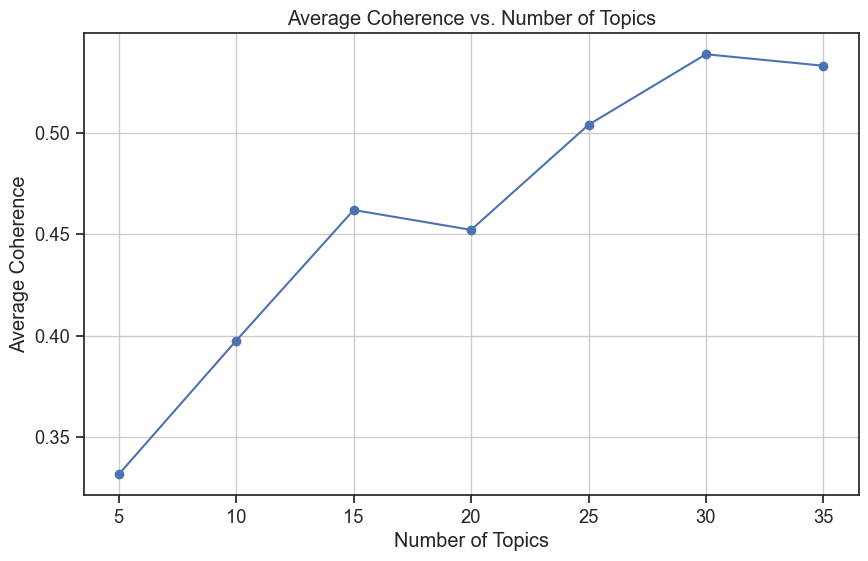

In [278]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

import matplotlib.pyplot as plt

def plot_coherence(num_topics_range, coherence_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_range, coherence_scores, marker='o', linestyle='-')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.grid(True)
    plt.show()

# Initialize lists to store coherence scores
coherence_scores = []
coherence_scores_per_topic = []
num_topics_range = range(5, 40, 5)  


for num_topics in num_topics_range:
    new_lda_model = tp.LDAModel(k=num_topics)

    for text in training_data:
        new_lda_model.add_doc(text.split())

    # Train the new model
    new_lda_model.train(0)  
    num_iters = 10
    for i in range(num_iters):
        new_lda_model.train(1)

    # Calculate coherence score 
    coh = tp.coherence.Coherence(new_lda_model, coherence='c_v')
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(new_lda_model.k)]

    coherence_scores.append(average_coherence)
    coherence_scores_per_topic.append(coherence_per_topic)

# Plot the coherence scores
plot_coherence(num_topics_range, coherence_scores)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [222]:
# Q7a (code)

import re
from IPython.display import Markdown, display

topic_distributions = [list(doc.get_topic_dist()) for doc in lda_model.docs]

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(text, topic_distributions, topic_indices, n=5):
    for topic_index in topic_indices:
        sorted_data = sorted([(_distribution[topic_index], _document)
                              for _distribution, _document
                              in zip(topic_distributions, text)], reverse=True)

        topic_words = topics[topic_index]

        make_md(f"### Topic {topic_index}\n\n{topic_words}\n\n")
        print("---")

        for probability, doc in sorted_data[:n]:
            # Make topic words bolded
            for word in topic_words.split():
                if word in doc.lower():
                    doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

            make_md(f'\n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

print("\nTop documents for topics potentially related to Sanders:\n")
get_top_docs(original_texts, topic_distributions, topic_indices=[2, 12])

print("\nTop documents for topics potentially related to Trump:\n")
get_top_docs(original_texts, topic_distributions, topic_indices=[5, 9])


Top documents for topics potentially related to Sanders:



### Topic 2

people health care america americans trump must workers country american



---



**Topic Probability**: 0.9358037710189819  
**Document**: It is truly outrageous that Senate Republicans refuse to act as tens of millions lose their jobs, income and **health** **care**.

It’s time to join the rest of the world. Congress **must** make sure that every worker keeps their paycheck and **health** insurance until this crisis is over.




**Topic Probability**: 0.9335955381393433  
**Document**: Three **people** own more wealth than half of America.

13 million **people** are working two or three jobs to make ends meet.

That is going to change when we make corporate America put **workers** on corporate boards and have a share in their companies' profits. https://t.co/3ddimmT7UB




**Topic Probability**: 0.8931747078895569  
**Document**: NEW: Journalist Jane Mayer talks campaign finance on the Bernie Sanders Show. Listen and subscribe on iTunes:
https://t.co/v3bcMcQO5Z https://t.co/OhGF52yoFZ




**Topic Probability**: 0.8917498588562012  
**Document**:  RT @marcorubio: Made good progress on getting 💰 into the hands of small businesses so they don’t have to lay off their **workers**.  Senate isn’t leaving DC until we address the house passed bills and additional measures to help with #Covid_19




**Topic Probability**: 0.886916995048523  
**Document**: The rich get much richer and the Republicans think they need more help. I do not believe those are the priorities of the American **people**.



### Topic 12

people workers wage must time country great american jobs pay



---



**Topic Probability**: 0.9336016178131104  
**Document**: If Mike Pence actually wants to protect life, he can start with ending this administration’s attacks on women and health care in America. https://t.co/7c3sJZN5DH




**Topic Probability**: 0.9198095202445984  
**Document**: Today I introduced legislation with @NydiaVelazquez that would end unequal treatment of the territories, help Puerto Rico recover from the hurricanes and aid the most vulnerable in our society by providing sustainable economic relief going forward. https://t.co/fVeHo8trtS




**Topic Probability**: 0.9125429391860962  
**Document**: In America, a woman—not the government or her employer—**must** control her own body. We **must** vigorously defend women’s access to all reproductive health services and allow them to make their own medical decisions.
https://t.co/XQgsVhfPAM




**Topic Probability**: 0.9038282036781311  
**Document**: It is disgraceful that we have a president who is holding hostage the paychecks of 800,000 federal employees all because he didn't like being attacked by Fox News. Mr. President, end this dangerous shutdown now. https://t.co/5O1FkhHB2r




**Topic Probability**: 0.898785412311554  
**Document**: The federal minimum **wage** for tipped **workers** is a starvation **wage** of $2.13 an hour. 

We **must** raise it to at least $15 an hour and make it easier for **workers** to join unions.




Top documents for topics potentially related to Trump:



### Topic 5

trump people great american president today must thank country democrats



---



**Topic Probability**: 0.8713291883468628  
**Document**:  “Trump Economy Breaks Holiday Shopping Records.” @FoxNews




**Topic Probability**: 0.8621848821640015  
**Document**: It's grossly unfair that interest rates on student loans are two to three times higher than on auto loans.




**Topic Probability**: 0.8621848821640015  
**Document**:  Republicans will totally protect **people** with Pre-Existing Conditions, Democrats will not! Vote Republican.




**Topic Probability**: 0.8621848821640015  
**Document**:  RT @realDonaldTrump: 95% Approval Rating in the Republican Party, a record. 53% Approval Rating overall (can we add 7 to 10 percent because of the Trump “thing?”). Thank you!




**Topic Probability**: 0.8516413569450378  
**Document**: The important lesson to be learned from yesterday is that when we stand together, we win. Let's continue the fight.



### Topic 9

great america thank tonight president today people big trump whitehouse



---



**Topic Probability**: 0.9039228558540344  
**Document**:  RT @realDonaldTrump: Thank you Macon, Georgia! Get out on Tuesday, November 6th and VOTE for @BrianKempGA as your next Governor to protect your jobs, defend your borders, fight for your values, and continue MAKING AMERICA GREAT AGAIN! https://t.co/Hzbqw35oNM




**Topic Probability**: 0.9039228558540344  
**Document**:  New York, get out and VOTE for @JohnFasoNy, a **great** and hardworking Congressman. We need John’s voice in D.C. His opponent just moved to the area - is Pro-Iran and Anti-Israel. Vote for John. Has my Strong Endorsement!




**Topic Probability**: 0.8870387077331543  
**Document**:  Massive #MAGARally🇺🇸**tonight** in Indiana, **thank** you. Everyone get out and https://t.co/0pWiwCHGbh! https://t.co/5jVFO6SIsz




**Topic Probability**: 0.8629550337791443  
**Document**: It makes no sense to me that the United States of America has more jails and prisons than colleges and universities.




**Topic Probability**: 0.8629550337791443  
**Document**:  RT @atouk_zug: @ScottAdamsSays It's gotten to the point where I can't even bring myself to make Biden jokes anymore.  It's beyond sad.  It's elder abuse by the @DNC.  As sole caregiver to my mother before her death at 84, the things I'm seeing here by his handlers are obvious and inexcusable.



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

Some topics are more closely associated with the views and priorities of either Bernie Sanders or Donald Trump.  For topics related to Sanders, particularly Topic 2, the focus is on critical issues such as healthcare access, income inequality, and workers' rights.  The documents within this topic highlights Sanders' advocacy for economic and social justice. Similarly, Topic 12 underscores Sanders' emphasis on workers' rights and economic equality, with tweets discussing fair wages, government shutdowns, and support for legislation benefiting working-class Americans.

Conversely, topics related to Donald Trump, like Topic 5, center around narratives of economic prosperity, political loyalty, and criticism of Democratic policies. The tweets within this topic showcase positive portrayals of the economy, expressions of political support, and attacks on Democratic initiatives, aligning with Trump's messaging on economic achievements and political opposition.  Additionally, Topic 9 emphasizes themes of patriotism, political endorsements, and campaign events, with tweets expressing gratitude to supporters, urging political participation, and disparaging political opponents.

In summary, the analysis highlights the distinct policy priorities, ideological differences, and messaging strategies of Bernie Sanders and Donald Trump. These topics and tweets refelct their contrasting visions for America's future.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [20]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

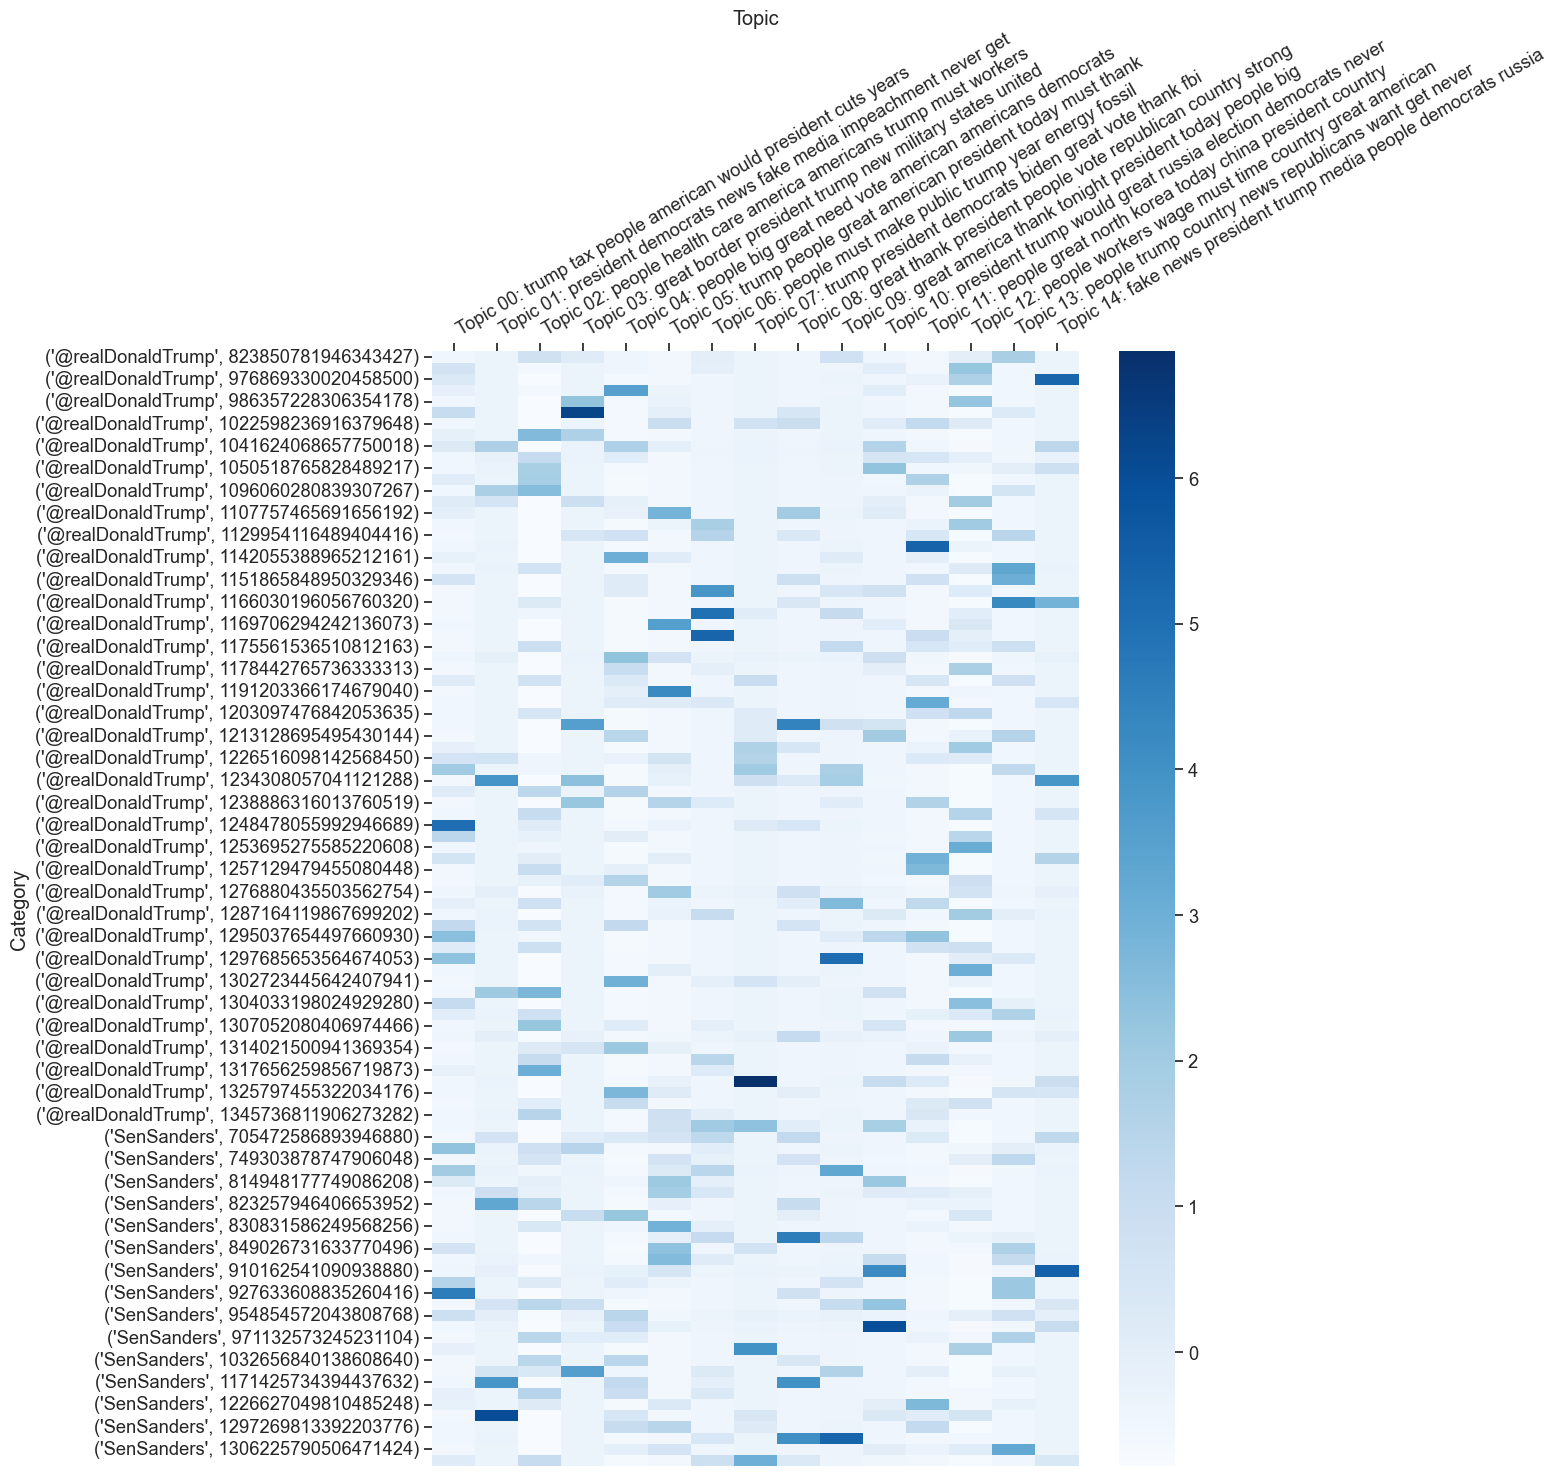

In [235]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='ticks', font_scale=1.2)

def plot_categories_by_topics_heatmap(target_labels,
                                      topic_distributions,
                                      topic_keys,
                                      color_map=sns.cm.rocket_r):

    dicts_to_plot = []
    for _label, _distribution in zip(target_labels, topic_distributions):
        for _topic_index, _probability in enumerate(_distribution):
            dicts_to_plot.append({'Probability': float(_probability),
                                  'Category': _label,
                                  'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:8])})

    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()
    # Show the final plot.
    plt.figure(figsize=(15, 15))
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  color_map='Blues')


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

Q9 (words): Sometimes we can conclude that certain themes and topics are seem to be more likely for one politician compared to the other based on the heatmap. A typical example is topic 3, which focuses on border security and military strength under President Trump's leadership may be discussed by Trump more frequently. Conversely, topic 10 was discussed by Sanders more frequently, likely because it involves critique of President Trump and concerns about election integrity and Russian interference, which are  themes in Sanders' political narrative. 

However, the dataset contains significantly more tweets from Trump than from Sanders which caused skewed sample, which means the heatmap naturally show more data points for Trump. For example, although topic 2 is primarily associated with Sanders, some Trump tweets are evidently related to this topic as well. On the other hand, it might also indicate occasional overlap in the subjects addressed by both politicians. Regardless, the heatmap analysis is very useful for identifying topic differences and associations, providing strong support for a deeper understanding of the subjects addressed.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

Number of Trump Tweets: 50
Number of Sanders Tweets: 50
Balanced Sample of Tweets:
           Username              TweetId  \
0        SenSanders  1093573599980634112   
1        SenSanders   949398409676558336   
2        SenSanders  1067152462493159424   
3  @realDonaldTrump  1087200167802163200   
4  @realDonaldTrump  1313832140287750145   

                                  Title  \
0        SenSanders_1093573599980634112   
1         SenSanders_949398409676558336   
2        SenSanders_1067152462493159424   
3  @realDonaldTrump_1087200167802163200   
4  @realDonaldTrump_1313832140287750145   

                                             Content  
0  Mr. Trump, you are dead wrong. This is not a "...  
1  This is a health crisis that no one is talking...  
2  The fact that we have a President of the Unite...  
3   Curt Schilling deserves to be in the Baseball...  
4   RT @dbongino: It’s Wednesday, October 7th 202...  


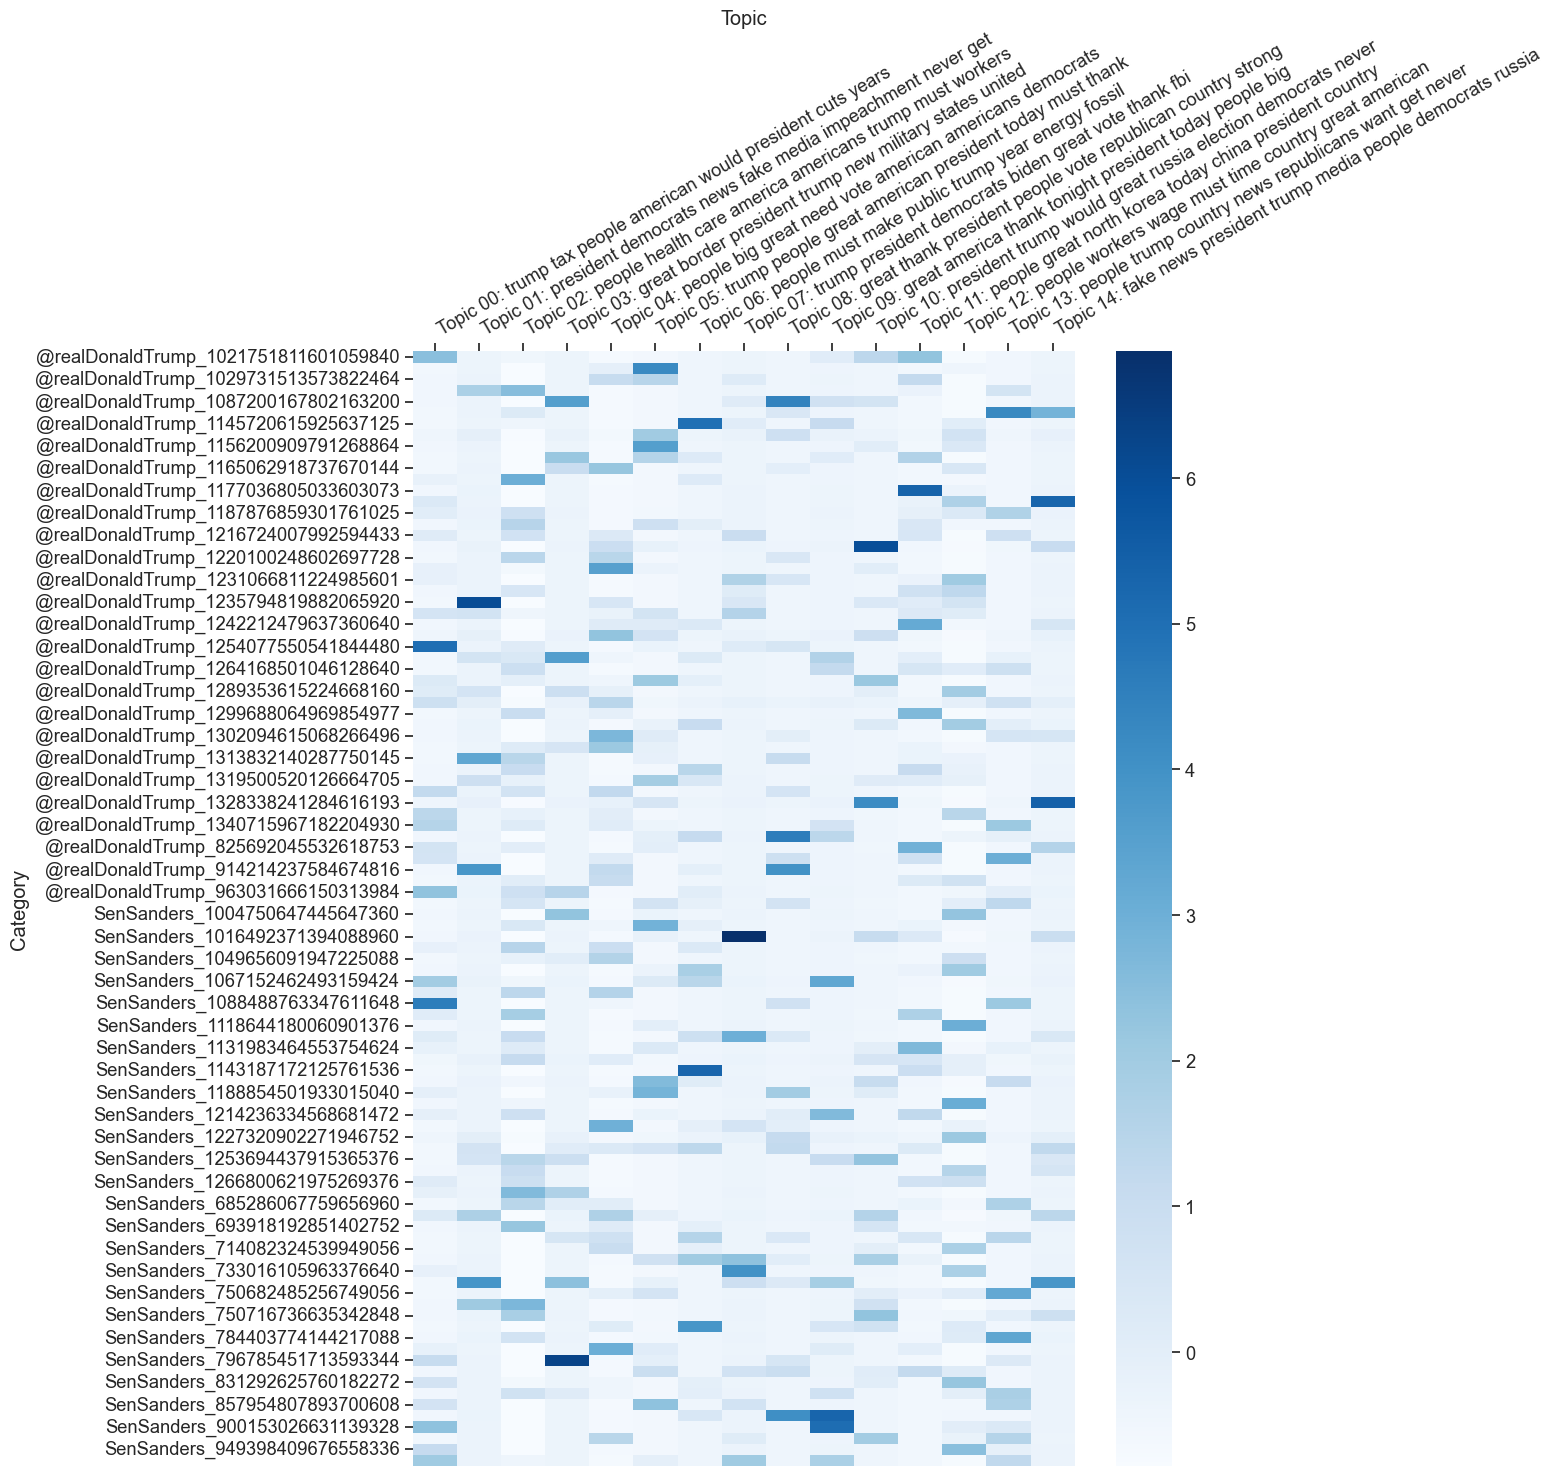

In [431]:
# X2 (code)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 50 tweets from each politician
trump_sample = trump_tweets_df.sample(n=50, random_state=42)
sanders_sample = sanders_tweets_df.sample(n=50, random_state=42)

# Concatenate the samples
balanced_sample = pd.concat([trump_sample, sanders_sample], ignore_index=True)
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Filter tweets by politician
trump_tweets = balanced_sample[balanced_sample['Username'].str.contains('trump', case=False)]
sanders_tweets = balanced_sample[balanced_sample['Username'].str.contains('sanders', case=False)]

# Print the number of tweets for each politician in the balanced sample
print("Number of Trump Tweets:", trump_tweets.shape[0])
print("Number of Sanders Tweets:", sanders_tweets.shape[0])

# Print a preview of the balanced sample
print("Balanced Sample of Tweets:")
print(balanced_sample.head())

# Define the function with an additional parameter for the title column
def plot_categories_by_topics_heatmap(balanced_sample,
                                      topic_distributions,
                                      topic_keys,
                                      title_column,
                                      color_map=sns.cm.rocket_r):

    dicts_to_plot = []
    for index in balanced_sample.index:
        for topic_index, probability in enumerate(topic_distributions[index]):
            dicts_to_plot.append({
                'Probability': float(probability),
                'Category': balanced_sample[title_column][index],
                'Topic': f'Topic {topic_index:02}: {" ".join(topic_keys[topic_index][:8])}'
            })

    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', columns='Topic', values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    plt.figure(figsize=(15, 15))
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# Call the function with the title_column parameter
plot_categories_by_topics_heatmap(balanced_sample,
                                  topic_distributions,
                                  topic_individual_words,
                                  title_column='Title',
                                  color_map='Blues')


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

X3 ( words)：<br>
In this DataFrame, each row corresponds to a document, while each column represents a different topic. Documents are assigned to topics based on the distribution of words, which means the values reflect the degree of association between each document and topic. For example, document 0 is most associated with Topic_2, indicating a high relevance to that particular topic, potentially involving content or themes related to it. In summary helps reveal the thematic structure of the document collection and the association between documents and topics.


In [301]:
# X3 (code )
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

# Create a DataFrame containing topic distributions for all tweets
df_to_plot = pd.DataFrame(topic_distributions, columns=[f'Topic_{i}' for i in range(len(topic_distributions[0]))])

# Calculate the mean and standard deviation of each topic across all tweets
topic_means = df_to_plot.mean()
topic_std = df_to_plot.std()
df_norm_all = (df_to_plot - topic_means) / topic_std
print(df_norm_all)



        Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5   Topic_6  \
0      0.049402 -0.503429  3.676290 -0.491409 -0.497948 -0.481396 -0.475942   
1      0.959274 -0.491736 -0.479390 -0.479837 -0.486427 -0.469950 -0.465005   
2      1.698595 -0.468401  0.004122 -0.456746 -0.463435  0.595108  1.053378   
3     -0.481715 -0.495332 -0.482718  2.015721 -0.489970 -0.473470 -0.468368   
4     -0.487598  0.562436  2.968096 -0.489093 -0.495642  0.077893 -0.473753   
...         ...       ...       ...       ...       ...       ...       ...   
30346 -0.465482  0.778271 -0.468018 -0.467675 -0.061245 -0.457920 -0.033129   
30347  1.881873 -0.261445 -0.266300 -0.251945 -0.259526 -0.244528 -0.249603   
30348 -0.242722 -0.261445 -0.266300 -0.251945 -0.259526 -0.244528 -0.249603   
30349  6.096586 -0.485062 -0.473215 -0.473233 -0.479851 -0.065964  0.302195   
30350  1.088668 -0.352752 -0.350788 -0.342301 -0.349489 -0.333905 -0.335007   

        Topic_7   Topic_8   Topic_9  Topic_10  Topi